# **Projeto de Análise de Risco no Transporte Público**

In [34]:
# Imports
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
sns.set_theme(style="whitegrid")

## Load data

In [36]:
data = pd.read_csv('data/tfl_bus_safety.csv')
data

,year,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...
23153,2018,2018-09-01,(blank),East London,Stagecoach,West Ham,Newham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23154,2018,2018-09-01,(blank),London United,London United,Hounslow,Not specified,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23155,2018,2018-09-01,(blank),London United,London United,Park Royal,Harrow,Injuries treated on scene,Slip Trip Fall,Operational Staff,Male,Adult
23156,2018,2018-09-01,(blank),London United,London United,Shepherds Bush,Hammersmith & Fulham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult


In [37]:
print(f'O dataset possui {data.shape[0]} linhas e {data.shape[1]} colunas')

O dataset possui 23158 linhas e 12 colunas


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       23158 non-null  int64 
 1   date_of_incident           23158 non-null  object
 2   route                      23158 non-null  object
 3   operator                   23158 non-null  object
 4   group_name                 23158 non-null  object
 5   bus_garage                 23158 non-null  object
 6   borough                    23158 non-null  object
 7   injury_result_description  23158 non-null  object
 8   incident_event_type        23158 non-null  object
 9   victim_category            23158 non-null  object
 10  victims_sex                23158 non-null  object
 11  victims_age                23158 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.1+ MB


Não há dados nulos e a grande maioria dos atributos são do tipo object.

### Entendendo as colunas do dataset:

- **year**: Ano do acidente
- **date_of_incident**: Data exata do acidente com dia, mês e ano
- **route**: Rota do transporte público
- **operator**: Operador do transporte público
- **group_name**: Provavelmente esse é o nome do grupo que é responsável pela operação do transporte público
- **bus_garage**: Garagem do ônibus
- **borough**: Distrito, provavelmente de onde o acidente ocorreu
- **injury_result_description**: Descrição do resultado da lesão
- **incident_event_type**: Tipo de evento do incidente
- **victim_category**: Categoria da vítima no incidente
- **victims_sex**: Sexo das vítimas
- **victims_age**: Idade das vítimas


### Qual a quantidade de valores únicos por atributo?

In [39]:
for col in data.columns:
    print(f'{col} :: {data[col].nunique()}')

year :: 4
date_of_incident :: 45
route :: 612
operator :: 25
group_name :: 14
bus_garage :: 84
borough :: 35
injury_result_description :: 4
incident_event_type :: 10
victim_category :: 17
victims_sex :: 3
victims_age :: 5


## Feature engineering

Irei trabalhar nos dados de data para gerar novas features de dia e mês.

In [40]:
# Removendo a coluna 'year' para usar os dados da coluna 'date_of_incident'
data = data.drop(labels='year', axis=1)

In [41]:
# Transformando os dados de data em formato de datetime
data['date_of_incident'] = pd.to_datetime(data['date_of_incident'])

In [42]:
# Gerando novas variáveis para análises futuras
data['year'] = data['date_of_incident'].dt.year
data['month'] = data['date_of_incident'].dt.month
data['day'] = data['date_of_incident'].dt.day

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_of_incident           23158 non-null  datetime64[ns]
 1   route                      23158 non-null  object        
 2   operator                   23158 non-null  object        
 3   group_name                 23158 non-null  object        
 4   bus_garage                 23158 non-null  object        
 5   borough                    23158 non-null  object        
 6   injury_result_description  23158 non-null  object        
 7   incident_event_type        23158 non-null  object        
 8   victim_category            23158 non-null  object        
 9   victims_sex                23158 non-null  object        
 10  victims_age                23158 non-null  object        
 11  year                       23158 non-null  int32         
 12  mont

## Análises dos dados para responder as perguntas do projeto

Todo projeto de análise de dados precisa ter um objetivo claro e perguntas a serem respondidas.

Neste projeto temos 10 perguntas que serão respondidas de forma detalhada usando, primeiro, uma seleção dos dados necessários com uma query SQL e depois um gráfico ajudando a entender melhor o resultado gerado com a query.

### 1. **Qual a quantidade de incidentes por gênero?**

In [44]:
incidents_by_gender = sqldf(
    '''
    SELECT victims_sex, COUNT(route) as Quantidade
    FROM data
    GROUP BY "victims_sex"
    '''
)

print(incidents_by_gender)

  victims_sex  Quantidade
0      Female       11847
1        Male        7709
2     Unknown        3602


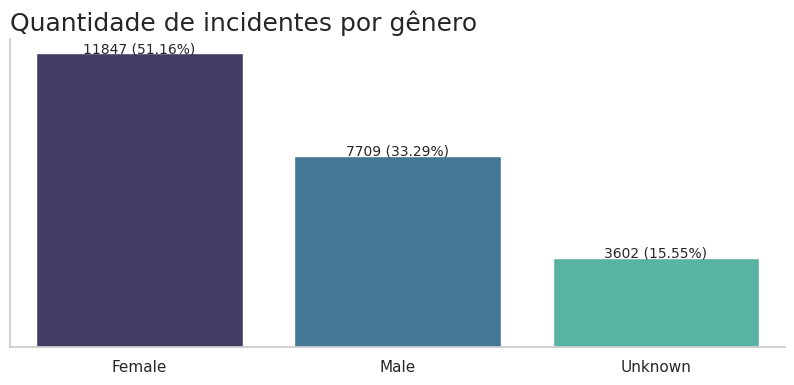

In [45]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.barplot(data=incidents_by_gender,
                 x='victims_sex',
                 y='Quantidade',
                 palette='mako',
                 hue='victims_sex')

ax.set_title('Quantidade de incidentes por gênero', loc='left', fontsize=18)
ax.set_xlabel('Gênero').set_visible(False)
ax.set_ylabel('Quantidade').set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.tick_params(labelleft = False)
ax.grid(False)

total = incidents_by_gender['Quantidade'].sum()

for i in range(incidents_by_gender.shape[0]):
    value = incidents_by_gender['Quantidade'][i]
    percent = value / total
    ax.text(i, value, f'{value} ({percent*100:.2f}%)',
           fontsize=10, ha='center')

plt.show()

Mais de 50% dos acidentes ocorrem com pessoas do sexo feminino.

### 2. **Qual faixa etária esteve mais envolvida nos incidentes?**

In [46]:
incidents_by_age = sqldf(
    '''
    SELECT victims_age, COUNT(route) as Quantidade
    FROM data
    GROUP BY "victims_age"
    '''
)

print(incidents_by_age)

  victims_age  Quantidade
0       Adult       10754
1       Child        2181
2     Elderly        2769
3     Unknown        7135
4       Youth         319


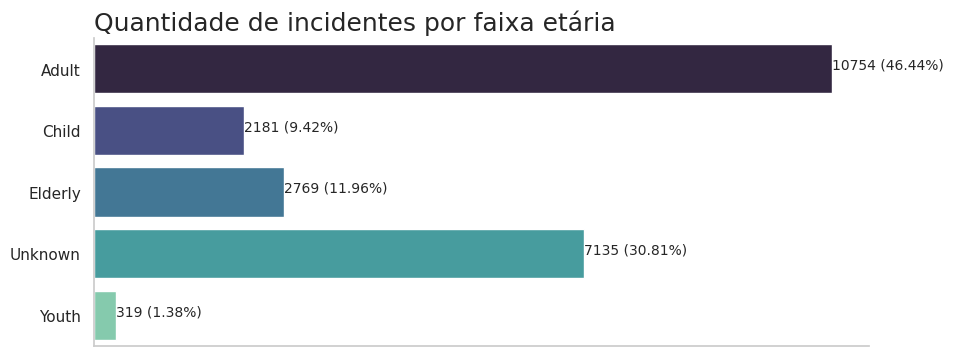

In [47]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.barplot(data=incidents_by_age,
                 y='victims_age',
                 x='Quantidade',
                 palette='mako',
                 hue='victims_age',
                 orient='h')

ax.set_title('Quantidade de incidentes por faixa etária', loc='left', fontsize=18)
ax.set_xlabel('Quantidade').set_visible(False)
ax.set_ylabel('Faixa etária').set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.tick_params(labelleft = True)
ax.tick_params(labelbottom = False)
ax.grid(False)

total = incidents_by_age['Quantidade'].sum()

for i in range(incidents_by_age.shape[0]):
    value = incidents_by_age['Quantidade'][i]
    percent = value / total
    ax.text(value, i, f'{value} ({percent*100:.2f}%)', fontsize=10)

plt.show()

A faixa etária mais envolvida em acidentes é a adulta, com 46% dos casos.

Em 31% dos acidentes a faixa etária é desconhecida.

### 3. **Qual o percentual de incidentes por tipo de evento (Incident EventType)?**

In [48]:
incidents_by_type = sqldf(
    '''
    SELECT incident_event_type, COUNT(route) as Quantidade
    FROM data
    GROUP BY "incident_event_type"
    '''
)

print(incidents_by_type)

       incident_event_type  Quantidade
0  Activity Incident Event         114
1                  Assault         590
2       Collision Incident        4166
3                     Fire           6
4         Onboard Injuries        6563
5          Personal Injury        4596
6                  Robbery           3
7  Safety Critical Failure          66
8           Slip Trip Fall        6981
9    Vandalism Hooliganism          73


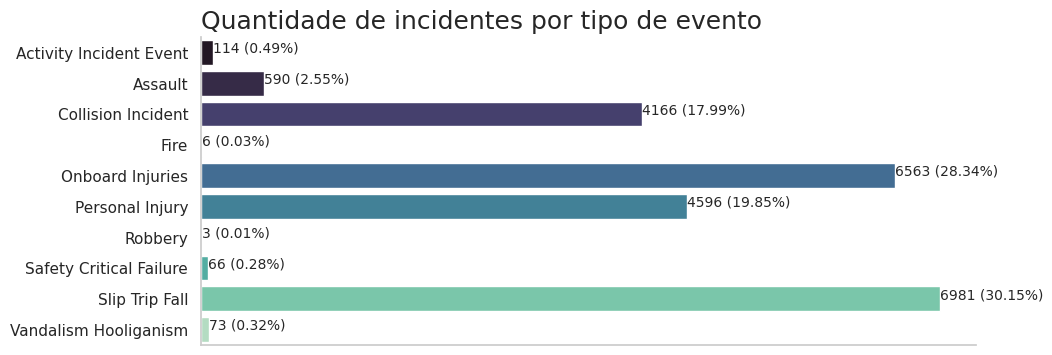

In [49]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.barplot(data=incidents_by_type,
                 y='incident_event_type',
                 x='Quantidade',
                 palette='mako',
                 hue='incident_event_type',
                 orient='h')

ax.set_title('Quantidade de incidentes por tipo de evento', loc='left', fontsize=18)
ax.set_xlabel('Quantidade').set_visible(False)
ax.set_ylabel('Evento').set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.tick_params(labelleft = True)
ax.tick_params(labelbottom = False)
ax.grid(False)

total = incidents_by_type['Quantidade'].sum()

for i in range(incidents_by_type.shape[0]):
    value = incidents_by_type['Quantidade'][i]
    percent = value / total
    ax.text(value, i, f'{value} ({percent*100:.2f}%)', fontsize=10)

plt.show()

30.15% dos eventos são de 'Slip Trip Fall', que signifca uma queda por escorregão ou tropeço.

28.34% são eventos de lesão a bordo e 17.99% são acidentes por colisão.

Vou olhar as descrições desses acidentes mais comuns para ter uma ideia da gravidade dos casos.

In [50]:
injury_description = data[['day', 'incident_event_type', 'injury_result_description']].groupby(
    ['incident_event_type', 'injury_result_description']).count()
injury_description = injury_description.rename(columns={'day':'count'})

# Calculate percentage for each injury description by each event type
injury_description_percent = injury_description.groupby(level=0).apply(lambda x: 100 * x / x.sum())
injury_description['percent'] = injury_description_percent.values

# Unstack index
injury_description = injury_description.unstack(level=1)

In [51]:
injury_description['percent']

injury_result_description,Fatal,Injuries treated on scene,Reported Minor Injury - Treated at Hospital,Taken to Hospital – Reported Serious Injury or Severity Unknown
incident_event_type,,,,
Activity Incident Event,NaN,63.157895,7.017544,29.824561
Assault,0.169492,72.542373,13.220339,14.067797
Collision Incident,0.864138,62.001920,16.970715,20.163226
Fire,NaN,100.000000,NaN,NaN
Onboard Injuries,0.030474,76.078013,11.305805,12.585708
Personal Injury,NaN,86.422977,9.399478,4.177546
Robbery,NaN,66.666667,NaN,33.333333
Safety Critical Failure,NaN,83.333333,10.606061,6.060606
Slip Trip Fall,0.042974,73.986535,11.488325,14.482166


Pode ser verificado que na grande maioria dos é casos as lesões são tratadas no local.

Esse é um indicador interessante que pode indicar que os casos não foram tão graves, pois foram tratados no local.

### 4. **Como foi a evolução de incidentes por mês ao longo do tempo?**

In [52]:
incidents_by_month = sqldf(
    '''
    SELECT year, month, COUNT(route) as Quantidade
    FROM data
    GROUP BY year, month
    '''
)

print(incidents_by_month)

    year  month  Quantidade
0   2015      1         399
1   2015      2         371
2   2015      3         460
3   2015      4         470
4   2015      5         472
5   2015      6         564
6   2015      7         558
7   2015      8         446
8   2015      9         487
9   2015     10         470
10  2015     11         495
11  2015     12         523
12  2016      1         466
13  2016      2         484
14  2016      3         449
15  2016      4         504
16  2016      5         494
17  2016      6         460
18  2016      7         507
19  2016      8         513
20  2016      9         582
21  2016     10         551
22  2016     11         612
23  2016     12         471
24  2017      1         435
25  2017      2         487
26  2017      3         579
27  2017      4         563
28  2017      5         510
29  2017      6         516
30  2017      7         650
31  2017      8         563
32  2017      9         549
33  2017     10         621
34  2017     11     

In [53]:
incidents_by_month['datetime_column'] = pd.to_datetime(
    incidents_by_month['year'].astype(str) + '-' + incidents_by_month['month'].astype(str) + '-01')

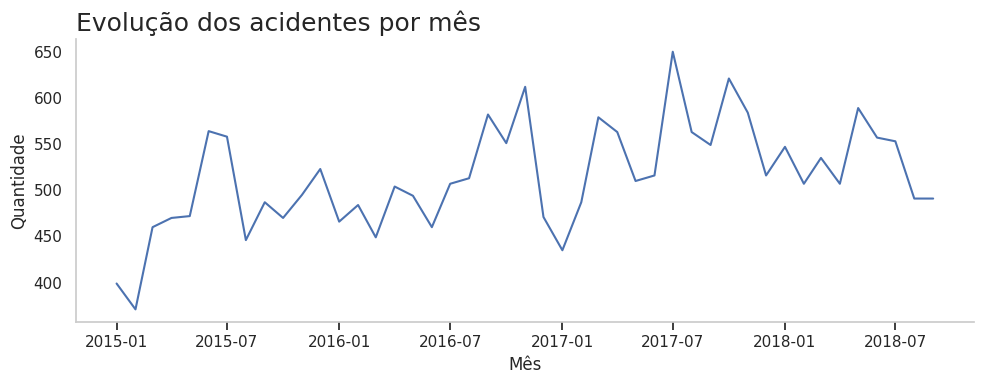

In [54]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.lineplot(data=incidents_by_month,
              x = 'datetime_column',
              y = 'Quantidade')

ax.set_title('Evolução dos acidentes por mês', loc='left', fontsize=18)
ax.set_xlabel('Mês').set_visible(True)
ax.set_ylabel('Quantidade').set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.xaxis.set_ticks_position('bottom')
ax.grid(False)

fig.tight_layout()

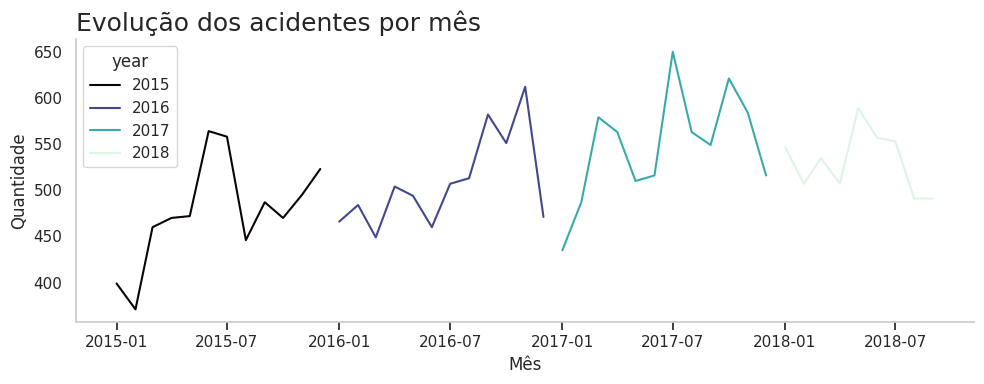

In [55]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.lineplot(data=incidents_by_month,
              x = 'datetime_column',
              y = 'Quantidade',
              hue='year',
              palette='mako')

ax.set_title('Evolução dos acidentes por mês', loc='left', fontsize=18)
ax.set_xlabel('Mês').set_visible(True)
ax.set_ylabel('Quantidade').set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.xaxis.set_ticks_position('bottom')
ax.grid(False)

fig.tight_layout()

Com o gráfico é visto que entre 2015 e 2017 houve uma tendência de aumento na quantidade de incidentes registrados. O ano de 2018 apresenta uma certa estabilidade sem um crescimento muito claro.

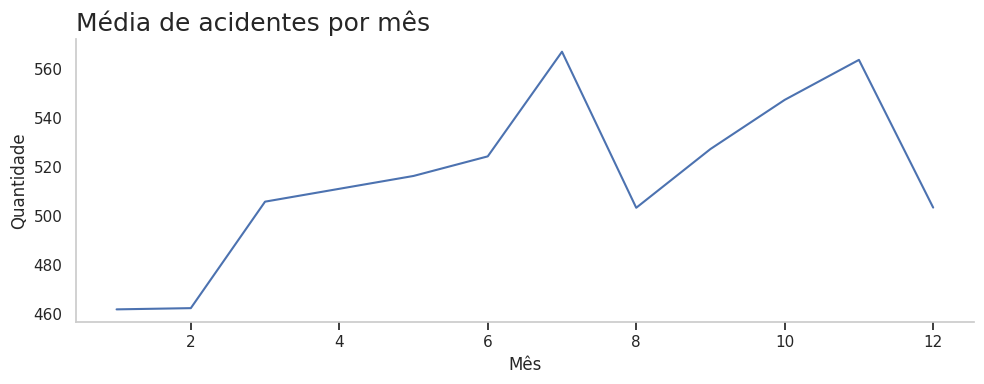

In [56]:
# Group data by month to see the mean by month
incidents_by_month_mean = incidents_by_month.groupby('month').mean()

fig, ax = plt.subplots(figsize=(10,4))

ax = sns.lineplot(data=incidents_by_month_mean,
              x = incidents_by_month_mean.index,
              y = 'Quantidade')

ax.set_title('Média de acidentes por mês', loc='left', fontsize=18)
ax.set_xlabel('Mês').set_visible(True)
ax.set_ylabel('Quantidade').set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.xaxis.set_ticks_position('bottom')
ax.grid(False)

fig.tight_layout()

Com o gráfico acima pode ser visto que há um tendência de crescimento de incidentes de janeiro até julho. Há uma redução no mês de agosto e os acidentes tendem a aumentar novamente até dezembro.

Os dados de 2018 vão até setembro, logo a média dos meses 10 ao 12 só contemplam os anos de 2015 até 2017.

### 5. **Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?**

In [57]:
incidents_by_collision = sqldf(
    '''
    SELECT month, year, COUNT(route) AS Quantidade
    FROM data
    WHERE victims_sex = "Female" and incident_event_type = "Collision Incident"
    GROUP BY month, year
    ORDER BY Quantidade DESC
    LIMIT 5
    '''
)

print(incidents_by_collision)

   month  year  Quantidade
0     11  2016          63
1      9  2016          56
2      8  2017          52
3      7  2017          49
4      1  2017          47


O mês com maior número de incidentes envolvendo pessoas do sexo feminino quando o incidente foi "Collision Incident" foi o mês de novembro de 2016 com 63 incidentes.

### 6. **Qual foi a média de incidentes por mês envolvendo crianças (Child)?**

In [58]:
incidents_by_child = sqldf(
    '''
    SELECT AVG(cnt) AS Media_por_Mes
    FROM(
        SELECT month, COUNT(*) AS cnt
        FROM data
        WHERE victims_age = "Child"
        GROUP BY month
    ) AS child_counts
    '''
)

print(incidents_by_child)

   Media_por_Mes
0         181.75


A média de incidentes por mês envolvendo crianças é 181.75

### 7. **Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?**

In [59]:
incidents_treated_on_scene = sqldf(
    '''
    SELECT victims_sex, COUNT(*) AS Quantidade
    FROM data
    WHERE injury_result_description = "Injuries treated on scene"
    GROUP BY victims_sex
    '''
)

print(incidents_treated_on_scene)

  victims_sex  Quantidade
0      Female        8816
1        Male        5632
2     Unknown        2888


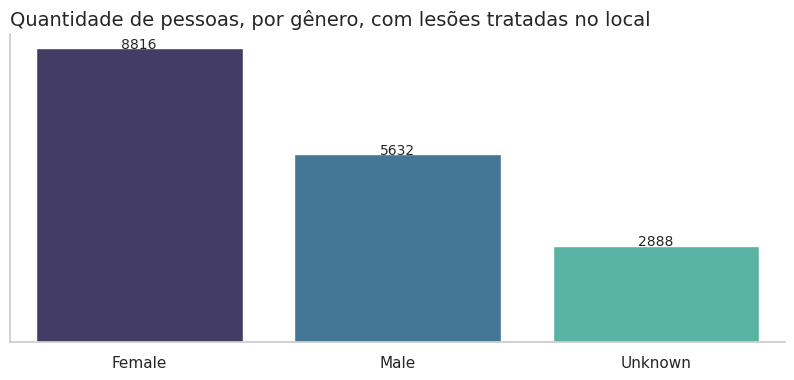

In [60]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.barplot(data=incidents_treated_on_scene,
                 x='victims_sex',
                 y='Quantidade',
                 palette='mako',
                 hue='victims_sex')

ax.set_title('Quantidade de pessoas, por gênero, com lesões tratadas no local', loc='left', fontsize=14)
ax.set_xlabel('Gênero').set_visible(False)
ax.set_ylabel('Quantidade').set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.tick_params(labelleft = False)
ax.grid(False)

total = incidents_treated_on_scene['Quantidade'].sum()

for i in range(incidents_treated_on_scene.shape[0]):
    value = incidents_treated_on_scene['Quantidade'][i]
    ax.text(i, value, f'{value}', fontsize=10, ha='center')

plt.show()

### 8. **No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?**

In [61]:
incidents_elderly = sqldf(
    '''
    SELECT month, COUNT(*) AS Quantidade
    FROM data
    WHERE victims_age = "Elderly" and year = 2017
    GROUP BY month
    ORDER BY Quantidade DESC
    '''
)

print(incidents_elderly)

    month  Quantidade
0       7          81
1       9          78
2       3          77
3       4          75
4       8          70
5      10          69
6       5          69
7      11          68
8      12          67
9       1          66
10      6          65
11      2          53


No ano de 2017 o mês com maior incidentes com idosos foi julho com 81 incidentes.

### 9. **Considerando o Operador qual a distribuição de incidentes ao longo do tempo?**

In [62]:
incidents_operator = sqldf(
    '''
    SELECT operator, year, month, COUNT(*) AS Quantidade
    FROM data
    GROUP BY operator, year, month
    '''
)

print(incidents_operator)

           operator  year  month  Quantidade
0    Abellio London  2015      1          11
1    Abellio London  2015      2           6
2    Abellio London  2015      3           7
3    Abellio London  2015      4           9
4    Abellio London  2015      5          11
..              ...   ...    ...         ...
831   Tower Transit  2018      6          19
832   Tower Transit  2018      7          11
833   Tower Transit  2018      8          11
834   Tower Transit  2018      9          14
835       Uno Buses  2017      5           1

[836 rows x 4 columns]


In [63]:
incidents_operator[['operator', 'Quantidade']].groupby('operator').describe()

Quantidade                                           \
                           count       mean        std   min    25%   50%   
operator                                                                    
Abellio London              45.0  21.400000  11.115918   6.0  11.00  23.0   
Abellio West                40.0   3.150000   2.444775   1.0   1.00   2.5   
Arriva Kent Thameside       17.0   6.294118   3.836742   1.0   3.00   6.0   
Arriva London North         45.0  71.288889  21.437671  15.0  56.00  69.0   
Arriva London South         45.0  38.733333   9.156220  15.0  34.00  39.0   
Arriva The Shires           26.0  11.730769   9.400245   1.0   7.00  10.0   
Blue Triangle Buses         44.0   6.386364   5.318751   1.0   2.00   4.5   
C T Plus                    35.0   2.200000   1.278786   1.0   1.00   2.0   
Docklands Buses             40.0   2.500000   2.025479   1.0   1.00   2.0   
East London                 45.0  53.377778  18.334380   4.0  39.00  53.0   
H R Richmond                24.0   2.458333   1.955575   1.0   1.00   2.0   
London Central              45.0  30.377778  11.798091  10.0  22.00  30.0   
London General              45.0  38.288889   8.195404  24.0  32.00  38.0   
London Sovereign            43.0   4.790698   2.956495   1.0   2.00   4.0   
London United               45.0  50.288889   9.659245  34.0  44.00  49.0   
Metrobus                    45.0  17.466667   6.225315   6.0  13.00  17.0   
Metroline                   45.0  76.822222  12.323829  55.0  69.00  75.0   
Metroline West              45.0  27.377778   7.036557  14.0  23.00  27.0   
Quality Line                15.0   9.466667   5.409868   1.0   6.00   9.0   
Selkent                     43.0  42.046512  15.352917   2.0  33.00  46.0   
Sullivan Bus & Coach         1.0   1.000000        NaN   1.0   1.00   1.0   
Sullivan Buses               2.0   1.000000   0.000000   1.0   1.00   1.0   
TGM GROUP                   10.0   6.100000   4.094712   2.0   3.25   6.0   
Tower Transit               45.0  16.400000   8.032321   4.0  11.00  15.0   
Uno Buses                    1.0   1.000000        NaN   1.0   1.00   1.0   

                                     
                         75%    max  
operator                             
Abellio London         29.00   49.0  
Abellio West            4.00   10.0  
Arriva Kent Thameside   9.00   14.0  
Arriva London North    88.00  125.0  
Arriva London South    43.00   61.0  
Arriva The Shires      14.75   50.0  
Blue Triangle Buses    10.00   24.0  
C T Plus                3.00    5.0  
Docklands Buses         3.00   11.0  
East London            67.00  101.0  
H R Richmond            3.00   10.0  
London Central         39.00   57.0  
London General         45.00   56.0  
London Sovereign        6.00   15.0  
London United          56.00   75.0  
Metrobus               22.00   31.0  
Metroline              87.00  104.0  
Metroline West         31.00   45.0  
Quality Line           15.00   17.0  
Selkent                53.50   70.0  
Sullivan Bus & Coach    1.00    1.0  
Sullivan Buses          1.00    1.0  
TGM GROUP               7.00   16.0  
Tower Transit          21.00   35.0  
Uno Buses               1.00    1.0

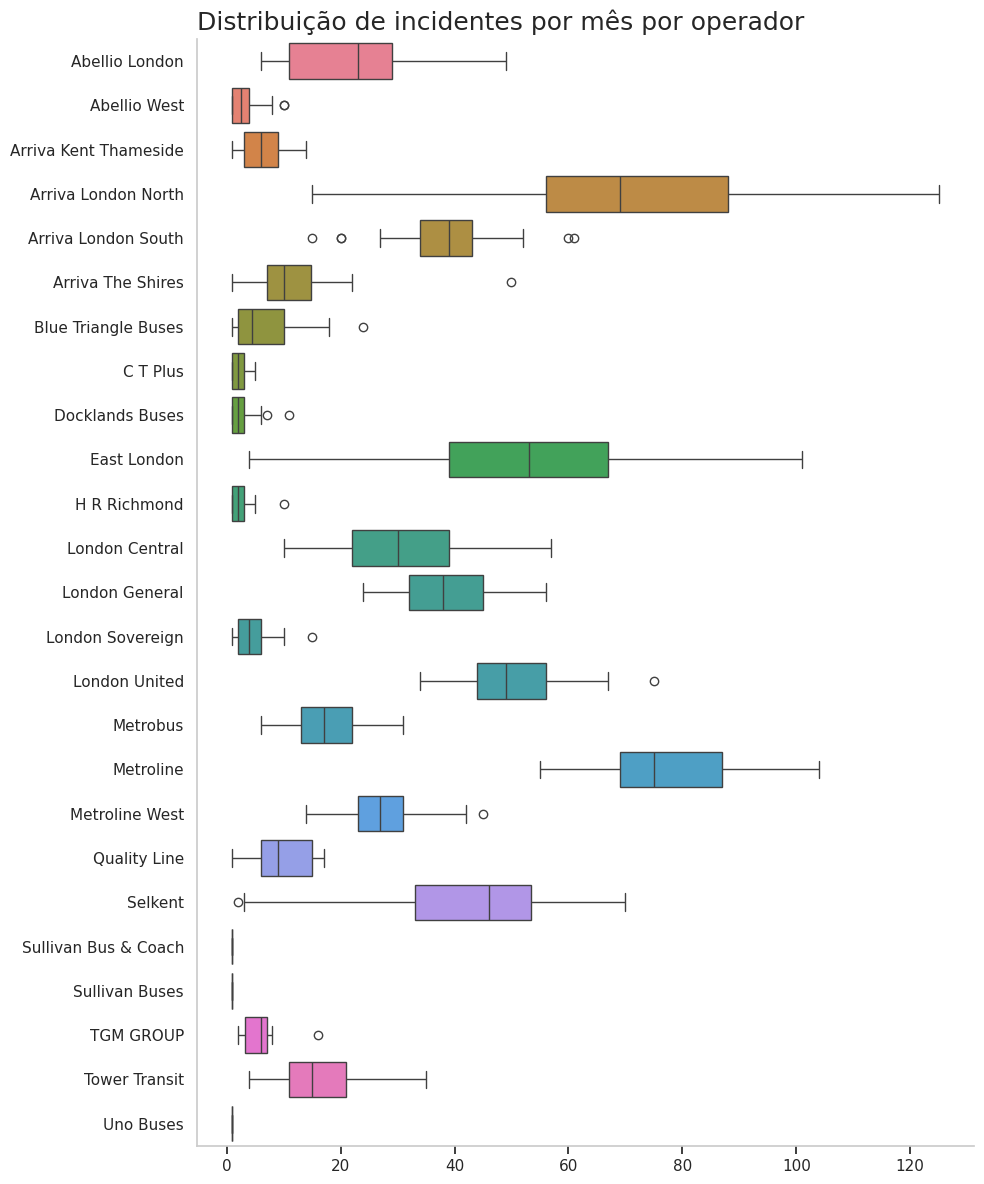

In [64]:
fig, ax = plt.subplots(figsize=(10,12))

ax = sns.boxplot(data=incidents_operator,
              y = 'operator',
              x = 'Quantidade',
              hue='operator')

ax.set_title('Distribuição de incidentes por mês por operador', loc='left', fontsize=18)
ax.set_xlabel('Quantidade').set_visible(False)
ax.set_ylabel('Operador').set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.xaxis.set_ticks_position('bottom')
ax.grid(False)

fig.tight_layout()

O operador Metroline possui uma distribuição mais concentrada de incidentes por mês com um valor médio de 76.82.

East London e Arriva London North possuem distribuições mais amplas com médias de 53.37 e 71.28, respectivamente.

### 10. **Qual o tipo de incidente mais comum com ciclistas?**

In [65]:
incidents_ciclista = sqldf(
    '''
    SELECT incident_event_type, COUNT(*) AS Quantidade
    FROM data
    WHERE victim_category = "Cyclist"
    GROUP BY incident_event_type
    '''
)

print(incidents_ciclista)

  incident_event_type  Quantidade
0  Collision Incident         256
1    Onboard Injuries           4
2     Personal Injury           8
3      Slip Trip Fall           7


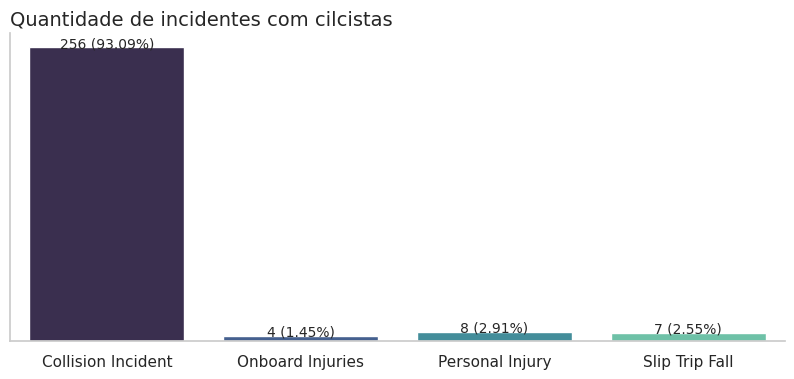

In [66]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.barplot(data=incidents_ciclista,
                 x='incident_event_type',
                 y='Quantidade',
                 palette='mako',
                 hue='incident_event_type')

ax.set_title('Quantidade de incidentes com cilcistas', loc='left', fontsize=14)
ax.set_xlabel('Caegoria').set_visible(False)
ax.set_ylabel('Quantidade').set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.tick_params(labelleft = False)
ax.grid(False)

total = incidents_ciclista['Quantidade'].sum()

for i in range(incidents_ciclista.shape[0]):
    value = incidents_ciclista['Quantidade'][i]
    percent = value / total
    ax.text(i, value, f'{value} ({percent*100:.2f}%)',
           fontsize=10, ha='center')

plt.show()

O tipo mais comum de acidentes com cilcistas é incidentes de colisão com mais 90% dos casos.